In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import metrics, model_selection
import glob
import seaborn as sns

%matplotlib inline

import os
print(os.listdir("."))

/home/lazukav/anaconda3/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


['titanic_submit.ipynb', '.ipynb_checkpoints', 'model2.csv', 'test.csv', 'train.csv', 'titanic_submit-old_copy.ipynb', 'model4.csv', 'model3.ipynb', 'model2.ipynb', 'model3.csv', 'model4.ipynb', 'model1.csv', 'model1.ipynb', 'EDA.ipynb', 'model5.csv']


In [3]:
def data_split(data):
    Y = data['Survived']
    X = data.drop(['Survived'], axis=1)
    return X, Y

def load_data(train_path='train.csv', test_path='test.csv'):
    train = pd.DataFrame.from_csv(train_path, index_col=0)
    test_X = pd.DataFrame.from_csv(test_path, index_col=0)
#     test_Y.drop([0], inplace=True)
#     test_Y = pd.Series.from_csv(test_labels)
    train_X, train_Y = data_split(train)
              
    return train_X, train_Y, test_X

In [14]:
train_X, train_Y, test_X = load_data()
train = pd.DataFrame.from_csv('train.csv', index_col=0)
test = pd.DataFrame.from_csv('test.csv', index_col=0)
print(train_X.shape, train_Y.shape)
print(test_X.shape)

(891, 10) (891,)
(418, 10)


/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys
/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/home/lazukav/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated

In [5]:
def data_stat(data):
    print("Describe: ", data.describe(), sep='\n')
    print("Correlation: ", data.corr(), sep='\n')
    print("#NaN: ", data.isna().sum(), sep='\n')

In [6]:
data_stat(train_X)

Describe: 
           Pclass         Age       SibSp       Parch        Fare
count  891.000000  714.000000  891.000000  891.000000  891.000000
mean     2.308642   29.699118    0.523008    0.381594   32.204208
std      0.836071   14.526497    1.102743    0.806057   49.693429
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      2.000000   20.125000    0.000000    0.000000    7.910400
50%      3.000000   28.000000    0.000000    0.000000   14.454200
75%      3.000000   38.000000    1.000000    0.000000   31.000000
max      3.000000   80.000000    8.000000    6.000000  512.329200
Correlation: 
          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age    -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp   0.083081 -0.308247  1.000000  0.414838  0.159651
Parch   0.018443 -0.189119  0.414838  1.000000  0.216225
Fare   -0.549500  0.096067  0.159651  0.216225  1.000000
#NaN: 
Pclass        0
Name          0


In [9]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
combine = [train, test]

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


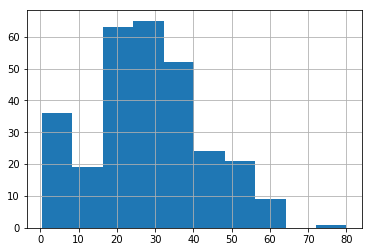

In [20]:
# train = pd.DataFrame.from_csv('train.csv', index_col=0)
train.Age[train.Survived==1].hist()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Mr
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Mrs
33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Miss
37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Mr


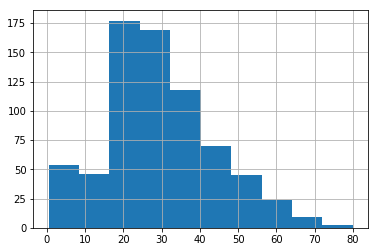

In [21]:
train.Age.hist()
train[train.Age.isna()]

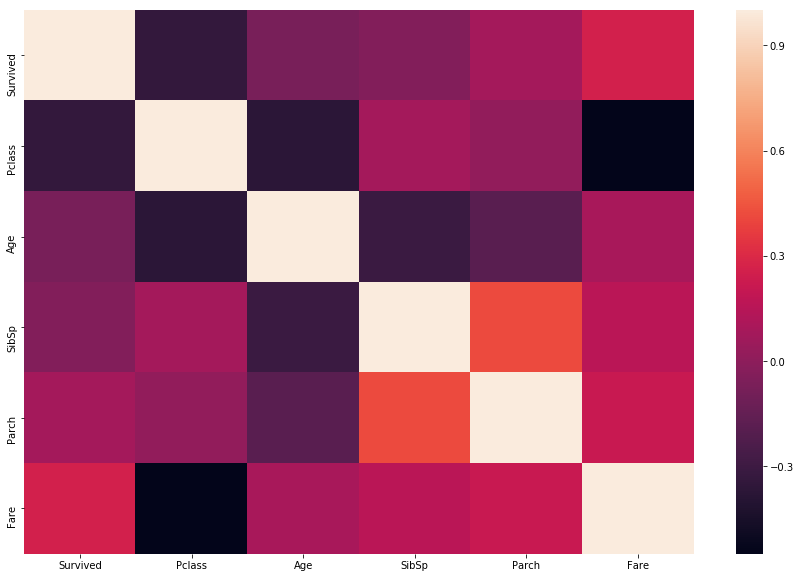

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr())

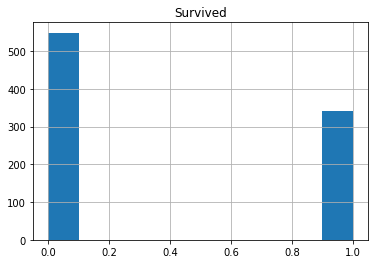

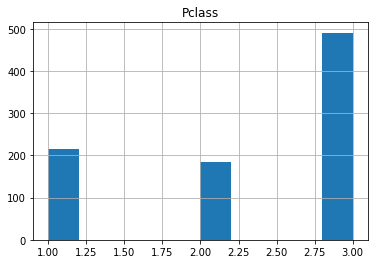

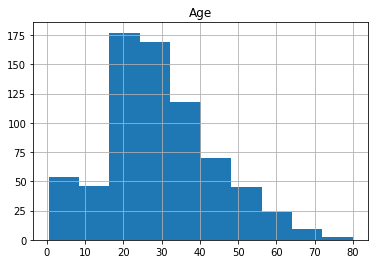

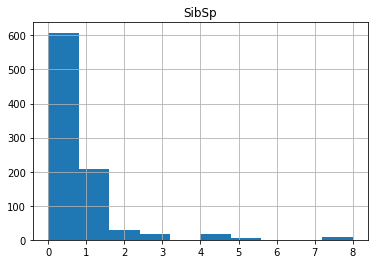

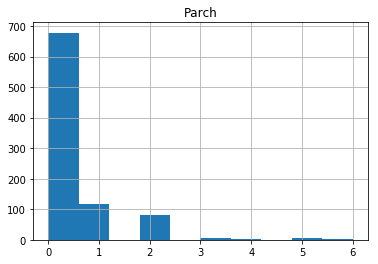

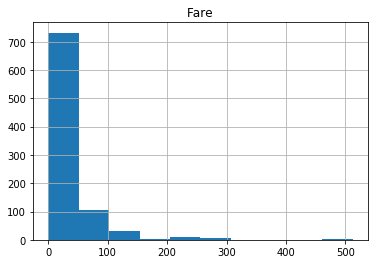

In [23]:
for i in train.select_dtypes(exclude=['object']).columns:
    train.hist(column=i)

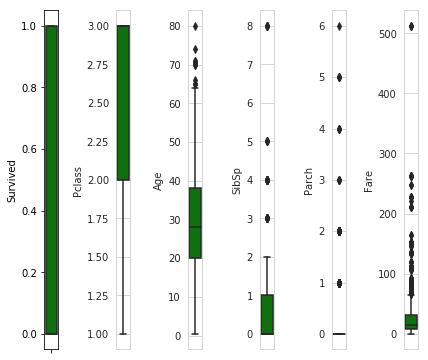

In [24]:
### Outliners ###
l = train.select_dtypes(exclude=['object']).columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(train[l[i]],color='green',orient='v')
    plt.tight_layout()